### Thank to Ha for helping with plotting the simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
class IslingModel:
    
    def __init__(self, N, T):
        # N is the size of the grid
        # T is the temperature 
        
        # Create the grid
        self.grid = np.random.choice(a = [+1, -1],size = (10, 10))
        self.N = N
        self.T = T
        
    def update(self):
        #choose the value of i, j within the range of N
        i = np.random.choice(self.N)
        j = np.random.choice(self.N)
        
        
        # Calculate the product of each neighbor with the cell
        top = self.grid[i][j]*self.grid[(i-1) % self.N][j]
        bottom = self.grid[i][j] * self.grid[(i+1) % self.N][j]
        left = self.grid[i][j] * self.grid[i][(j-1) % self.N]
        right = self.grid[i][j] * self.grid[i][(j+1) % self.N]
        
        #Calculate the energy
        energy = -(top+bottom+left+right)
        
        #Flip the sign of cell
        if np.random.random() < min(1, np.exp(2 * energy/self.T)):
            self.grid[i][j] = -self.grid[i][j]
    
    def run(self, no_steps):
        # Run the simulation
        for i in range(no_steps):
            self.update()
        return self.grid

def display_grid(grid):
    img = Image.fromarray(np.uint8((grid + 1) * 0.5 * 255))  # 0 ... 255
    return img.resize((200,200), Image.LANCZOS)

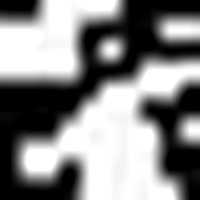

In [3]:
simulation = IslingModel(N=10, T = 1)
new_grid = simulation.run(no_steps = 100)
display_grid(new_grid)

In [7]:
# Calculate the average magnetization of the total system
def average_magnetization(no_trials, no_steps, T, N):
    
    # Record the average result
    results = []

    for _ in range(no_trials):
        simulation = IslingModel(N, T)
        new_grid = simulation.run(no_steps)
        avg_magnetization = 0
        for i in range(N):
            for j in range(N):
                avg_magnetization += new_grid[i][j]
        avg_magnetization = avg_magnetization/ N**2
        results.append(avg_magnetization)
    
    # Plot
    plt.subplot(1, 2, 1)
    plt.imshow(display_grid(new_grid))
    plt.subplot(1, 2, 2)
    plt.hist(results)
    plt.show()

When T =  1


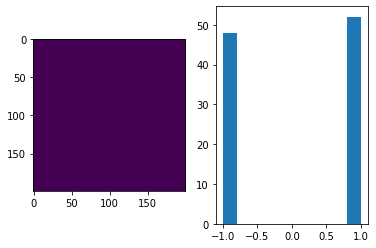

When T =  2


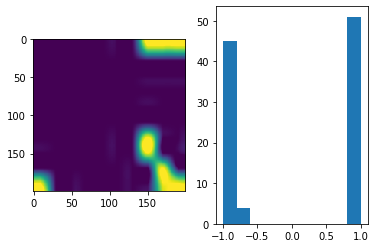

When T =  3


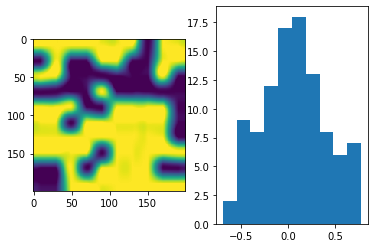

When T =  4


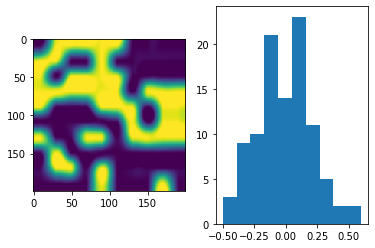

When T =  5


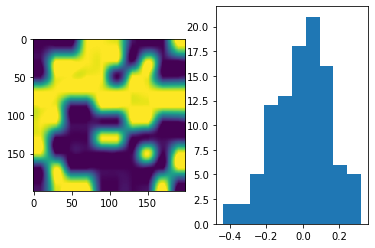

In [11]:
no_trials = 100
no_steps = 100000
N = 10
for i in range(1, 6):
    print("When T = ", i)
    average_magnetization(no_trials, no_steps, T=i, N=N)